In [1]:
#Importing Modules
import seaborn as sns
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,log_loss,classification_report,accuracy_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
train=pd.read_csv('train.csv')
train.authentic=train.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Data Wrangling

In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in our Dataset which we need to impute.
We will use Mode for categorical Variables and Mean or Median for Numerical Variables

In [6]:
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [15]:
train.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Applicantincomelog      0
CoApplicantincomelog    0
dtype: int64

Now our Dataset is not having missing values

In [8]:
Data_Cleaned=train.copy()

# Univariate Data Analysis

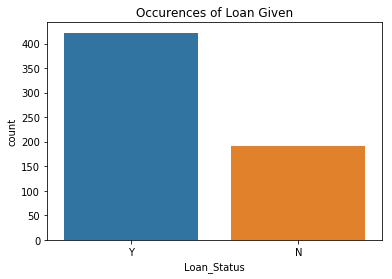

In [9]:
sns.countplot(x='Loan_Status',data=train)
plt.title('Occurences of Loan Given')
plt.show()

Approximatly 400 Loan applications are accepted and 170 Loan applications are rejected.

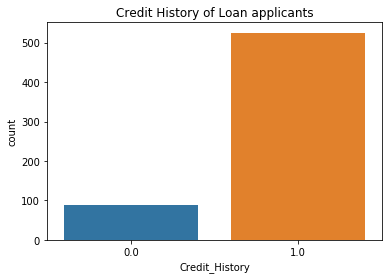

In [10]:
sns.countplot(x='Credit_History',data=train)
plt.title('Credit History of Loan applicants')
plt.show()

Only Very Few people do not have any credit history

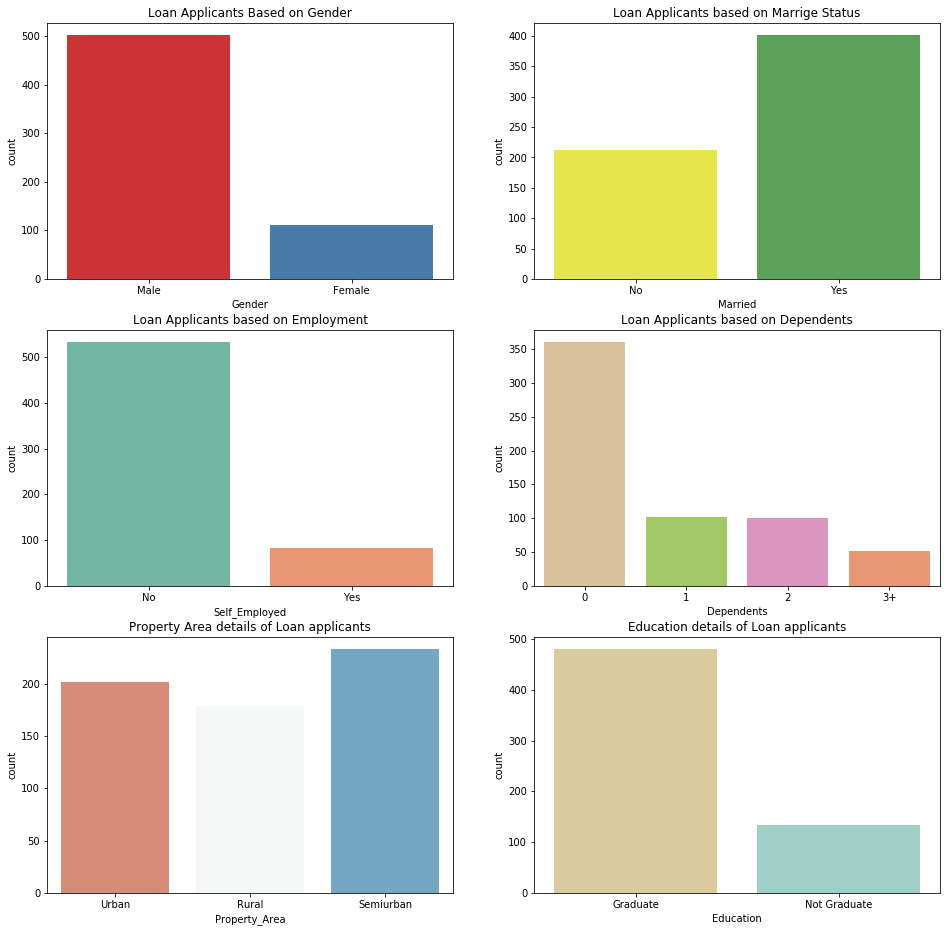

In [11]:
plt.figure(1,figsize=(16,16))
plt.subplot(321)
ax=sns.countplot(x='Gender',data=train,palette='Set1')
plt.title( 'Loan Applicants Based on Gender')

plt.subplot(322)
sns.countplot(x='Married',data=train,palette='Set1_r')
plt.title( 'Loan Applicants based on Marrige Status')

plt.subplot(323)
sns.countplot(x='Self_Employed',data=train,palette='Set2')
plt.title( 'Loan Applicants based on Employment')

plt.subplot(324)
sns.countplot(x='Dependents',data=train,palette='Set2_r')
plt.title( 'Loan Applicants based on Dependents')

plt.subplot(325)
sns.countplot(x='Property_Area',data=train,palette='RdBu')
plt.title('Property Area details of Loan applicants')

plt.subplot(326)
sns.countplot(x='Education',data=train,palette='BrBG')
plt.title('Education details of Loan applicants')

plt.show()

Men are Applying  loans more then Women...

Married people applying  loans more than unmarried people...

Self employed people applying loans fewer than un employed or Private Job Holders...

Majority of people applying for loans do not have any dependents...

Majority of Job applicants own Propety in Semi Urban area but there is no significant difference in rest of them...

Majority of Job Applicants are Graduates...

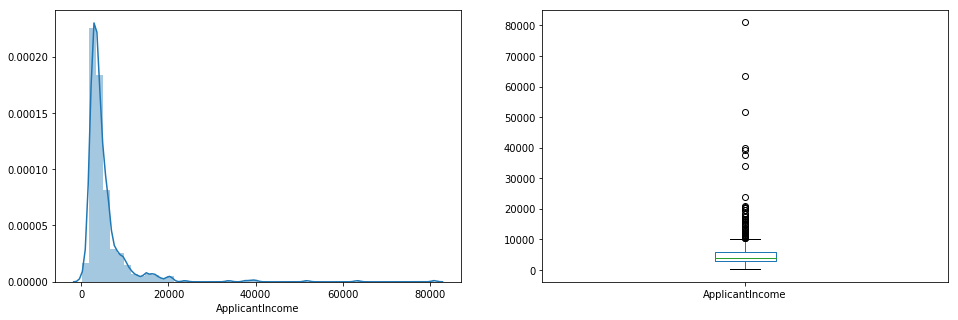

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Applicant Income seems having Negative Symmetry of Distribution and may have Outliers. Lets take Log transaformation

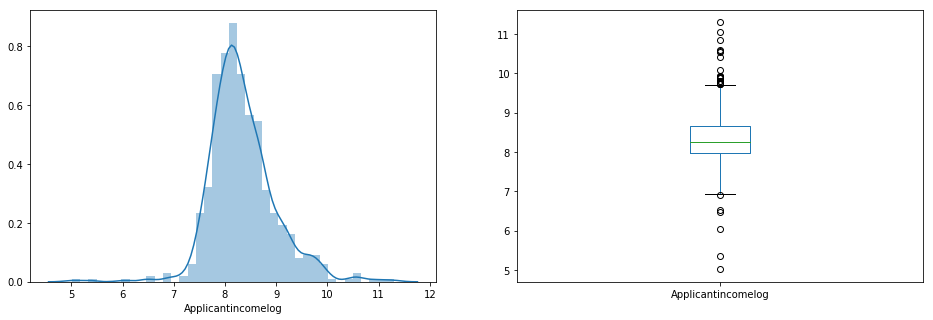

In [13]:
train['Applicantincomelog']=np.log(train.ApplicantIncome)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Applicantincomelog']);

plt.subplot(122)
train['Applicantincomelog'].plot.box(figsize=(16,5))

plt.show()

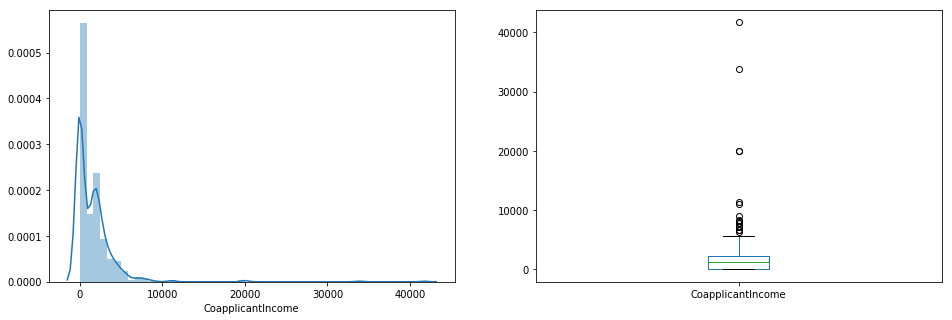

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Co Applicant Income seems having Negative Symmetry of Distribution and Bi Modal Peak and may have Outliers.

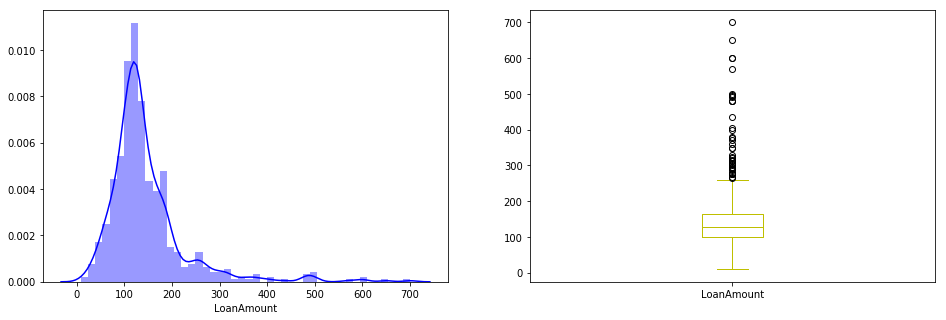

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'],color='b');

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5),color='y')

plt.show()

Loan Amount seems having Negative Symmetry of Distribution 

# BiVariate Analysis

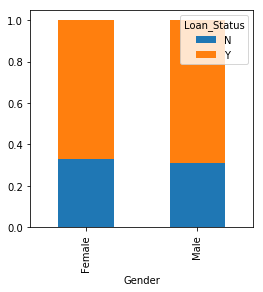

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Loan Status and Gender does not have significant Co relation

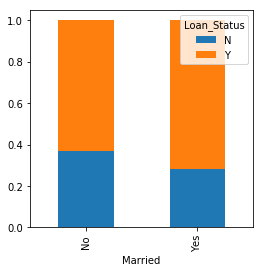

In [19]:
Marriage=pd.crosstab(train['Married'],train['Loan_Status'])
Marriage.div(Marriage.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Loan Status and Marriage does not have any significant Co relation, At Begining we had hypothesis that Loan acceptance  for Married people may be high  Now we Reject Null Hypothesis

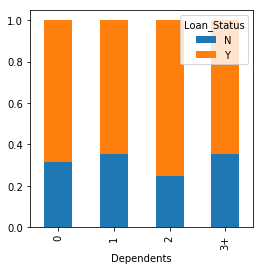

In [20]:
Dep=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dep.div(Dep.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is slight Co  Relation between Loan status and Dependents. If number of dependents are low than chances of loan approval are high

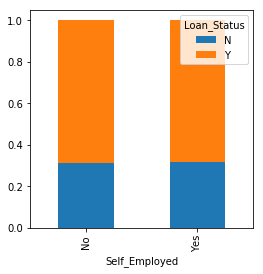

In [21]:
Emp=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Emp.div(Emp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Loan Status does not have any significant Co Relation with Employment 

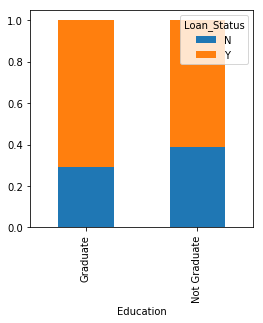

In [22]:
Edu=pd.crosstab(train['Education'],train['Loan_Status'])
Edu.div(Edu.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is slight co relation between Loan status and Education. Graduates are having good chances of loan approval. 

At begining we had Hypothesis that Educated people have more chances of Loan approval. Now we It proves true so we are accepting Null Hypothesis

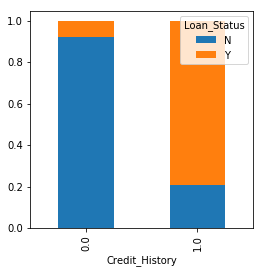

In [23]:
Cre=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Cre.div(Cre.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is Strong Co Relation between Loan status and Credit history, With Good credit history Loan acceptance chances are very high

At begining we had Hypothesisthat Credit History plays important role in Loan acceptance. Now it proved True so we are accepting Null Hypothesis

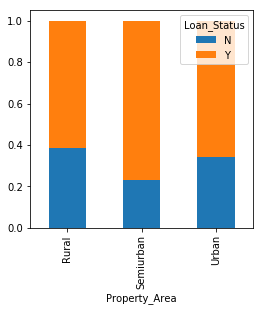

In [24]:
Pro=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Pro.div(Pro.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is slight Co Relation between Loan status and Property Area. Having Property area in Semi urban and urban are can get you more chances of loan approval

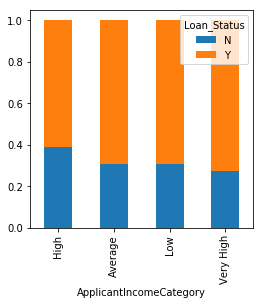

In [25]:
Bins=[0,2000,5000,20000,80000]
grps=['Low','Average','High','Very High']
train['ApplicantIncomeCategory']=pd.cut(train.ApplicantIncome,Bins,labels=grps)
Ic=pd.crosstab(train['ApplicantIncomeCategory'],train['Loan_Status'])
Ic.div(Ic.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is No  Co relation Between Loan status and Applicant Income At begining we had Hypotheis that Chances of Loan acceptance is high for people with more income...
Lets analyze Co applicant Income and then come to Clonslusion

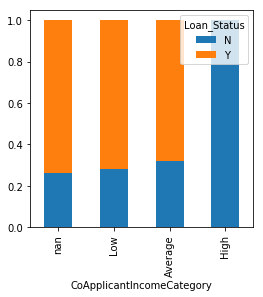

In [26]:
Bins=[0,2000,5000,20000,80000]
grps=['Low','Average','High','Very High']
train['CoApplicantIncomeCategory']=pd.cut(train.CoapplicantIncome,Bins,labels=grps)
CIc=pd.crosstab(train['CoApplicantIncomeCategory'],train['Loan_Status'])
CIc.div(CIc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is Strong Co  Relation ship between Co applicant Income and Loan status. Surprisingly If Co applicant income is high than Chances of Loan approval are very low. This seems suspicious. Let;s analyze Applicant income and Co applicant income together

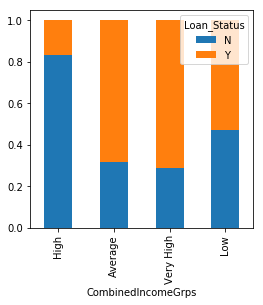

In [27]:
Bins=[0,2000,5000,20000,80000]
train['CombinedIncome']=train.ApplicantIncome+train.CoapplicantIncome
grps=['Low','Average','High','Very High']
train['CombinedIncomeGrps']=pd.cut(train.CombinedIncome,Bins,labels=grps)
Tc=pd.crosstab(train['CombinedIncomeGrps'],train['Loan_Status'])
Tc.div(Tc.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is Strong Relationship between Total Income and Loan status

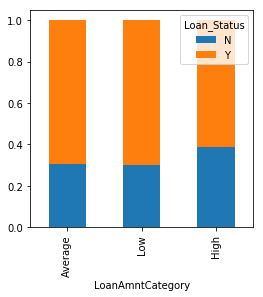

In [28]:
Bins=[0,100,200,700]
groups=['Low','Average','High']
train['LoanAmntCategory']=pd.cut(train.LoanAmount,Bins,labels=groups)
Lam=pd.crosstab(train['LoanAmntCategory'],train['Loan_Status'])
Lam.div(Lam.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

There is slight Co relation between Loan amount and Loan status. If Loan amount is high then Cahnces of loan approval are low.

At begining we had Hypotheis that  If loan amount is high then Loan acceptnce may be low, But now it proved True so we are accepting Null Hypotheis

In [29]:
#Now lets get rid of temporary variables and have Discrete values at Loan status
train=train.drop(['ApplicantIncomeCategory','CoApplicantIncomeCategory','CombinedIncomeGrps','LoanAmntCategory','CombinedIncome','ApplicantIncome','CoApplicantincomelog'],axis=1)
train.Dependents.replace('3+',3,inplace=True)
train.Loan_Status.replace('Y',1,inplace=True)
train.Loan_Status.replace('N',0,inplace=True)

In [38]:
Data_Copy2=train.copy()

# Building Model

In [41]:
X=train.drop(['Loan_Status','Loan_ID'],axis=1)
y=train.Loan_Status
X=pd.get_dummies(X)
Data_Dummy_Vars=X.copy()

First Let's Try Logistics Regression for our Binominal Classification Problem

Let's take Classfication report and Precision Recall curve and AUC Curve for our Model Evaluation

Confusion Matrix:
[[ 20  23]
 [  2 109]]
Accuracy Score: 0.8376623376623377
             precision    recall  f1-score   support

          0       0.91      0.47      0.62        43
          1       0.83      0.98      0.90       111

avg / total       0.85      0.84      0.82       154

Sensititvity: 0.46511627906976744
Specificity: 0.018018018018018018
Log Loss: 5.607063640348453


Text(0.5,1,'AUC Curve')

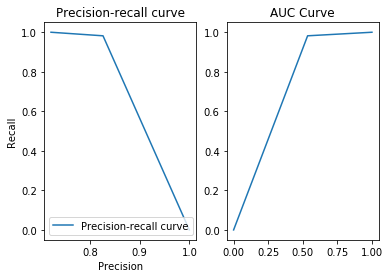

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
Regression=LogisticRegression(C=1)
Regression.fit(X_train,y_train)
Y_pred=Regression.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

#Precision recall curve
plt.subplot(121)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred)
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

#AUC
plt.subplot(122)
fpr,tpr,threshold=metrics.roc_curve(y_test,Y_pred)
metrics.auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.title('AUC Curve')

Al though Accuracy seems better Our Model Recall score is bad at Negative ones as ther is problem in False Negatives as Model  incorrectly classifying Positive ones as Negative

Let's Implement Grid Search for Best Parameters

In [43]:
from sklearn import grid_search
Regression=LogisticRegression(penalty='l2')
parameters = {'C':[0.1,0.001,1,10,100],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
GS = grid_search.GridSearchCV(Regression, parameters,cv=5,verbose=10)
GS.fit(X_train,y_train)
print (GS.best_params_ )
print (GS.best_score_) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, solver=newton-cg .........................................
[CV] ................ C=0.1, solver=newton-cg, score=0.827957 -   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ................ C=0.1, solver=newton-cg, score=0.804348 -   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ................ C=0.1, solver=newton-cg, score=0.782609 -   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.1, solver=newton-cg .........................................
[CV] ................ C=0.1, solver=newton-cg, score=0.739130 -   0.0s
[CV] C=0.1, solver=newton-cg .........................................
[CV] ................ C=0.1, solver=newton-cg, score=0.824176 -   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] .................... C=0.1, solver=lbfgs, score=0.827957 -   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] .................... C=0.1, solver=lbfgs, score=0.804348 -   0.0s
[CV] C=0.1, solver=lbfgs .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] .................... C=0.1, solver=lbfgs, score=0.739130 -   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] .................... C=0.1, solver=lbfgs, score=0.739130 -   0.0s
[CV] C=0.1, solver=lbfgs .............................................
[CV] .................... C=0.1, solver=lbfgs, score=0.813187 -   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ................ C=0.1, solver=liblinear, score=0.827957 -   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ................ C=0.1, solver=liblinear, score=0.804348 -   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ................ C=0.1, solver=liblinear, score=0.782609 -   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] ................ C=0.1, solver=liblinear, score=0.739130 -   0.0s
[CV] C=0.1, solver=liblinear .........................................
[CV] .

[CV] ....................... C=10, solver=sag, score=0.673913 -   0.0s
[CV] C=10, solver=sag ................................................
[CV] ....................... C=10, solver=sag, score=0.673913 -   0.0s
[CV] C=10, solver=sag ................................................
[CV] ....................... C=10, solver=sag, score=0.673913 -   0.0s
[CV] C=10, solver=sag ................................................
[CV] ....................... C=10, solver=sag, score=0.681319 -   0.0s
[CV] C=100, solver=newton-cg .........................................
[CV] ................ C=100, solver=newton-cg, score=0.827957 -   0.0s
[CV] C=100, solver=newton-cg .........................................
[CV] ................ C=100, solver=newton-cg, score=0.826087 -   0.0s
[CV] C=100, solver=newton-cg .........................................
[CV] ................ C=100, solver=newton-cg, score=0.804348 -   0.0s
[CV] C=100, solver=newton-cg .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


Let's Implement  above parameters

In [84]:
#['newton-cg', 'lbfgs', 'liblinear', 'sag'
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)
Regression=LogisticRegression(C=1,solver='liblinear',penalty='l2')
Regression.fit(X_train,y_train)
Y_pred=Regression.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 13  20]
 [  3 118]]
Accuracy Score: 0.8506493506493507
             precision    recall  f1-score   support

          0       0.81      0.39      0.53        33
          1       0.86      0.98      0.91       121

avg / total       0.85      0.85      0.83       154

Sensititvity: 0.3939393939393939
Specificity: 0.024793388429752067
Log Loss: 5.158492526178894


Even Grid search did not give us Improvement. Lets use PCA To Extract Features

In [85]:
from sklearn.decomposition import PCA
pca=PCA(n_components=8)
pca.fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)

In [87]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
Regression=LogisticRegression(C=1,solver='liblinear',penalty='l2')
Regression.fit(X_train,y_train)
Y_pred=Regression.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[  5  28]
 [ 14 107]]
Accuracy Score: 0.7272727272727273
             precision    recall  f1-score   support

          0       0.26      0.15      0.19        33
          1       0.79      0.88      0.84       121

avg / total       0.68      0.73      0.70       154

Sensititvity: 0.15151515151515152
Specificity: 0.11570247933884298
Log Loss: 9.41981167087204


Even PCA Could not Impove the accuracy. How much we tried in Logistics regression not able to get more than 83% accuracy
PCA did not help
fine tuning c parameter did not help
test size or random number did not help


Let's Implememt Support Vecor machine Algorithm

In [98]:
from sklearn import svm
train=Data_Copy2.copy()
X=train.drop(['Loan_Status','Loan_ID'],axis=1)
y=train.Loan_Status
X=pd.get_dummies(X)
Data_Dummy_Vars=X.copy()

We tried different kernels in SVM but Linear seems better. Poly was taking so much time to train the model and grid search for best parameters was running endlessly.
So best option in SVM is below parameters

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)
model=svm.SVC(kernel='linear',C=1)
model.fit(X_train,y_train)
Y_pred=model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 13  20]
 [  5 116]]
Accuracy Score: 0.8376623376623377
             precision    recall  f1-score   support

          0       0.72      0.39      0.51        33
          1       0.85      0.96      0.90       121

avg / total       0.82      0.84      0.82       154

Sensititvity: 0.3939393939393939
Specificity: 0.04132231404958678
Log Loss: 5.607048063775137


Let's Try Gaussian Classifier from  Naive Bayes class

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
Y_pred=gnb.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 13  20]
 [  4 117]]
Accuracy Score: 0.8441558441558441
             precision    recall  f1-score   support

          0       0.76      0.39      0.52        33
          1       0.85      0.97      0.91       121

avg / total       0.83      0.84      0.82       154

Sensititvity: 0.3939393939393939
Specificity: 0.03305785123966942
Log Loss: 5.382770294977016


In [103]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train, y_train)
Y_pred=model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 16  17]
 [ 11 110]]
Accuracy Score: 0.8181818181818182
             precision    recall  f1-score   support

          0       0.59      0.48      0.53        33
          1       0.87      0.91      0.89       121

avg / total       0.81      0.82      0.81       154

Sensititvity: 0.48484848484848486
Specificity: 0.09090909090909091
Log Loss: 6.279865793596184


Let's Try Decision Tress Algortihm for our classification

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 12  21]
 [  5 116]]
Accuracy Score: 0.8311688311688312
             precision    recall  f1-score   support

          0       0.71      0.36      0.48        33
          1       0.85      0.96      0.90       121

avg / total       0.82      0.83      0.81       154

Sensititvity: 0.36363636363636365
Specificity: 0.04132231404958678
Log Loss: 5.831331024764363


Let's Try Our last method Random Forest Regression

In [123]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 13  20]
 [  3 118]]
Accuracy Score: 0.8506493506493507
             precision    recall  f1-score   support

          0       0.81      0.39      0.53        33
          1       0.86      0.98      0.91       121

avg / total       0.85      0.85      0.83       154

Sensititvity: 0.3939393939393939
Specificity: 0.024793388429752067
Log Loss: 5.158492526178894


Thos one looks better so Let's Use Grid search for best parameters

In [128]:
model=RandomForestClassifier()
parameters={ 'max_depth':[4,5,6],'random_state':[0,1,3],'n_estimators':[50,75,100,125] }
GS=grid_search.GridSearchCV(model,parameters,cv=5,verbose=10)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, n_estimators=50, random_state=0 ....................
[CV]  max_depth=4, n_estimators=50, random_state=0, score=0.827957 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=0 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, n_estimators=50, random_state=0, score=0.771739 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=0 ....................
[CV]  max_depth=4, n_estimators=50, random_state=0, score=0.750000 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=0 ....................
[CV]  max_depth=4, n_estimators=50, random_state=0, score=0.804348 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=0 ....................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=4, n_estimators=50, random_state=0, score=0.758242 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=1 ....................
[CV]  max_depth=4, n_estimators=50, random_state=1, score=0.838710 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=1 ....................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=4, n_estimators=50, random_state=1, score=0.782609 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=1 ....................
[CV]  max_depth=4, n_estimators=50, random_state=1, score=0.771739 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=1 ....................
[CV]  max_depth=4, n_estimators=50, random_state=1, score=0.815217 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=1 ....................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=4, n_estimators=50, random_state=1, score=0.769231 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=3 ....................
[CV]  max_depth=4, n_estimators=50, random_state=3, score=0.838710 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=3 ....................
[CV]  max_depth=4, n_estimators=50, random_state=3, score=0.782609 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=3 ....................
[CV]  max_depth=4, n_estimators=50, random_state=3, score=0.771739 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=3 ....................
[CV]  max_depth=4, n_estimators=50, random_state=3, score=0.815217 -   0.0s
[CV] max_depth=4, n_estimators=50, random_state=3 ....................
[CV]  max_depth=4, n_estimators=50, random_state=3, score=0.758242 -   0.0s
[CV] max_depth=4, n_estimators=75, random_state=0 ....................
[CV]  max_depth=4, n_estimators=75, random_state=0, score=0.838710 -   0.1s
[CV] max_depth=4, n_estimators=75, random_

[CV]  max_depth=5, n_estimators=50, random_state=1, score=0.760870 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=1 ....................
[CV]  max_depth=5, n_estimators=50, random_state=1, score=0.836957 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=1 ....................
[CV]  max_depth=5, n_estimators=50, random_state=1, score=0.758242 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=3 ....................
[CV]  max_depth=5, n_estimators=50, random_state=3, score=0.817204 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=3 ....................
[CV]  max_depth=5, n_estimators=50, random_state=3, score=0.771739 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=3 ....................
[CV]  max_depth=5, n_estimators=50, random_state=3, score=0.739130 -   0.0s
[CV] max_depth=5, n_estimators=50, random_state=3 ....................
[CV]  max_depth=5, n_estimators=50, random_state=3, score=0.815217 -   0.0s
[CV] max_depth=5, n_estimators=50, random_

[CV]  max_depth=6, n_estimators=50, random_state=1, score=0.827957 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=1 ....................
[CV]  max_depth=6, n_estimators=50, random_state=1, score=0.771739 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=1 ....................
[CV]  max_depth=6, n_estimators=50, random_state=1, score=0.782609 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=1 ....................
[CV]  max_depth=6, n_estimators=50, random_state=1, score=0.793478 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=1 ....................
[CV]  max_depth=6, n_estimators=50, random_state=1, score=0.758242 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=3 ....................
[CV]  max_depth=6, n_estimators=50, random_state=3, score=0.827957 -   0.0s
[CV] max_depth=6, n_estimators=50, random_state=3 ....................
[CV]  max_depth=6, n_estimators=50, random_state=3, score=0.771739 -   0.0s
[CV] max_depth=6, n_estimators=50, random_

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   32.4s finished


Let's use above best parameters

In [129]:
clf = RandomForestClassifier(n_estimators=50, max_depth=4,random_state=1)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,Y_pred))
print('Accuracy Score:',accuracy_score(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
cm=confusion_matrix(y_test,Y_pred)
print('Sensititvity:',cm[0,0]/(cm[0,0]+cm[0,1]))
print('Specificity:',cm[1,0]/(cm[1,0]+cm[1,1]))
print('Log Loss:',log_loss(y_test,Y_pred))

Confusion Matrix:
[[ 13  20]
 [  3 118]]
Accuracy Score: 0.8506493506493507
             precision    recall  f1-score   support

          0       0.81      0.39      0.53        33
          1       0.86      0.98      0.91       121

avg / total       0.85      0.85      0.83       154

Sensititvity: 0.3939393939393939
Specificity: 0.024793388429752067
Log Loss: 5.158492526178894


Grid search also did not give any improvement

So Far best Score was given by Random Forset(85.06) and Logistics Regression(85.06),GaussainNB(84.4) But the common problem we faced Low Recall in other words 
is True Negative. We  are facing trouble in classifying Postives as positives. 